#**Data Science Engineering Methods and Tools**

## **Assignment 4** – Model Interpretability

**Name** - Mandar Deshmukh

**Nuid** - 002194579

# **Abstract**



Real estate is the basic need today, and the changes in the housing prices effects the investors and the common people. Hence, the prediction of the house prices has become an important concern.

The dataset used is "USA Housing Prices". The factors such as the Age of House, No of Rooms, Income, etc. has a huge impact on the housing prices. This notebook demonstrates model interpretation which may help in determining the most important features that may impact the housing prices in the United States. 

I have Interprated different models such as GBM, Decisiontree Regressor and performed SHAP and LIME analysis to find out the impact of predictors on the Target variable.
       

##Installing Libraries



In [ ]:
!pip install shap
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


##Imports

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy.orm import mapper
from sklearn.ensemble import RandomForestRegressor
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


##Linear Regression



In [ ]:
data1 = pd.read_csv('https://github.com/mandardeshmukh7/DataScience/raw/main/AutoML/USA_Housing.csv')

data=data1.rename(columns={'Avg. Area Income': 'Income', 'Avg. Area House Age' : 'Age', 'Avg. Area Number of Rooms'  : 'Rooms', 'Avg. Area Number of Bedrooms' : 'Bedrooms', 'Area Population' : 'Population'}) 

In [ ]:
print(f"Mean value of median house prices : {round(data['Price'].mean(), 2)}")

Mean value of median house prices : 1232072.65


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:

numerical_features = [c for c in X_train.columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [ ]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 81252.908, test MAE = 82237.569 


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:43:07   Log-Likelihood:                -58232.
No. Observations:                4500   AIC:                         1.165e+05
Df Residuals:                    4494   BIC:                         1.165e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.234e+06   1504.579    820.213      0.000    1.23e+06    1.24e+06
Income      2.312e+05   1505.532    153.587      0.000    2.28e+05    2.34e+05
Age         1.642e+05   1505.192    109.094      0.000    1.61e+05    1.67e+05
Rooms       1.219e+05   1698.607     71.781      0.000    1.19e+05    1.25e+05
Bedrooms    1657.2453   1699.648      0.975      0.330   -1674.901    4989.391
Population  1.507e+05   1504.977    100.143      0.000    1.48e+05    1.54e+05
==============================================================================
Omnibus:                        7.462   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.362
Skew:                           0.006   Prob(JB):                       0.0415
Kurtosis:                       2.816   Cond. No.                         1.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



The t-score and p-value of Income indicates that it has the highest significance on the target variable. However, Age, population and Rooms too play a significant role. Bedrooms is the least significant.

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.metrics import mean_squared_error, r2_score



regressor = DecisionTreeRegressor( max_depth=3,random_state=33)

regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

r2_score(y_pred, y_test)



print('DecisionTreeRegressor Train Score is : ' , regressor.score(X_train, y_train))

print('DecisionTreeRegressor Test Score is : ' , regressor.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.5318762006895668
DecisionTreeRegressor Test Score is :  0.504165012268684


##Node Interpretability

[Text(0.5, 0.875, 'X[0] <= 71422.59\nsquared_error = 125972618625.319\nsamples = 4500\nvalue = 1234075.707'),
 Text(0.25, 0.625, 'X[1] <= 5.87\nsquared_error = 97265132208.405\nsamples = 2711\nvalue = 1087199.458'),
 Text(0.125, 0.375, 'X[0] <= 61266.848\nsquared_error = 75446634703.172\nsamples = 1266\nvalue = 934856.893'),
 Text(0.0625, 0.125, 'squared_error = 66424773753.374\nsamples = 523\nvalue = 788091.552'),
 Text(0.1875, 0.125, 'squared_error = 55962369649.651\nsamples = 743\nvalue = 1038165.47'),
 Text(0.375, 0.375, 'X[4] <= 35044.916\nsquared_error = 78233004630.938\nsamples = 1445\nvalue = 1220670.522'),
 Text(0.3125, 0.125, 'squared_error = 60540076340.064\nsamples = 637\nvalue = 1084435.542'),
 Text(0.4375, 0.125, 'squared_error = 66014038582.851\nsamples = 808\nvalue = 1328073.594'),
 Text(0.75, 0.625, 'X[1] <= 6.075\nsquared_error = 87246228349.032\nsamples = 1789\nvalue = 1456647.821'),
 Text(0.625, 0.375, 'X[4] <= 36488.449\nsquared_error = 72333014341.935\nsamples = 9

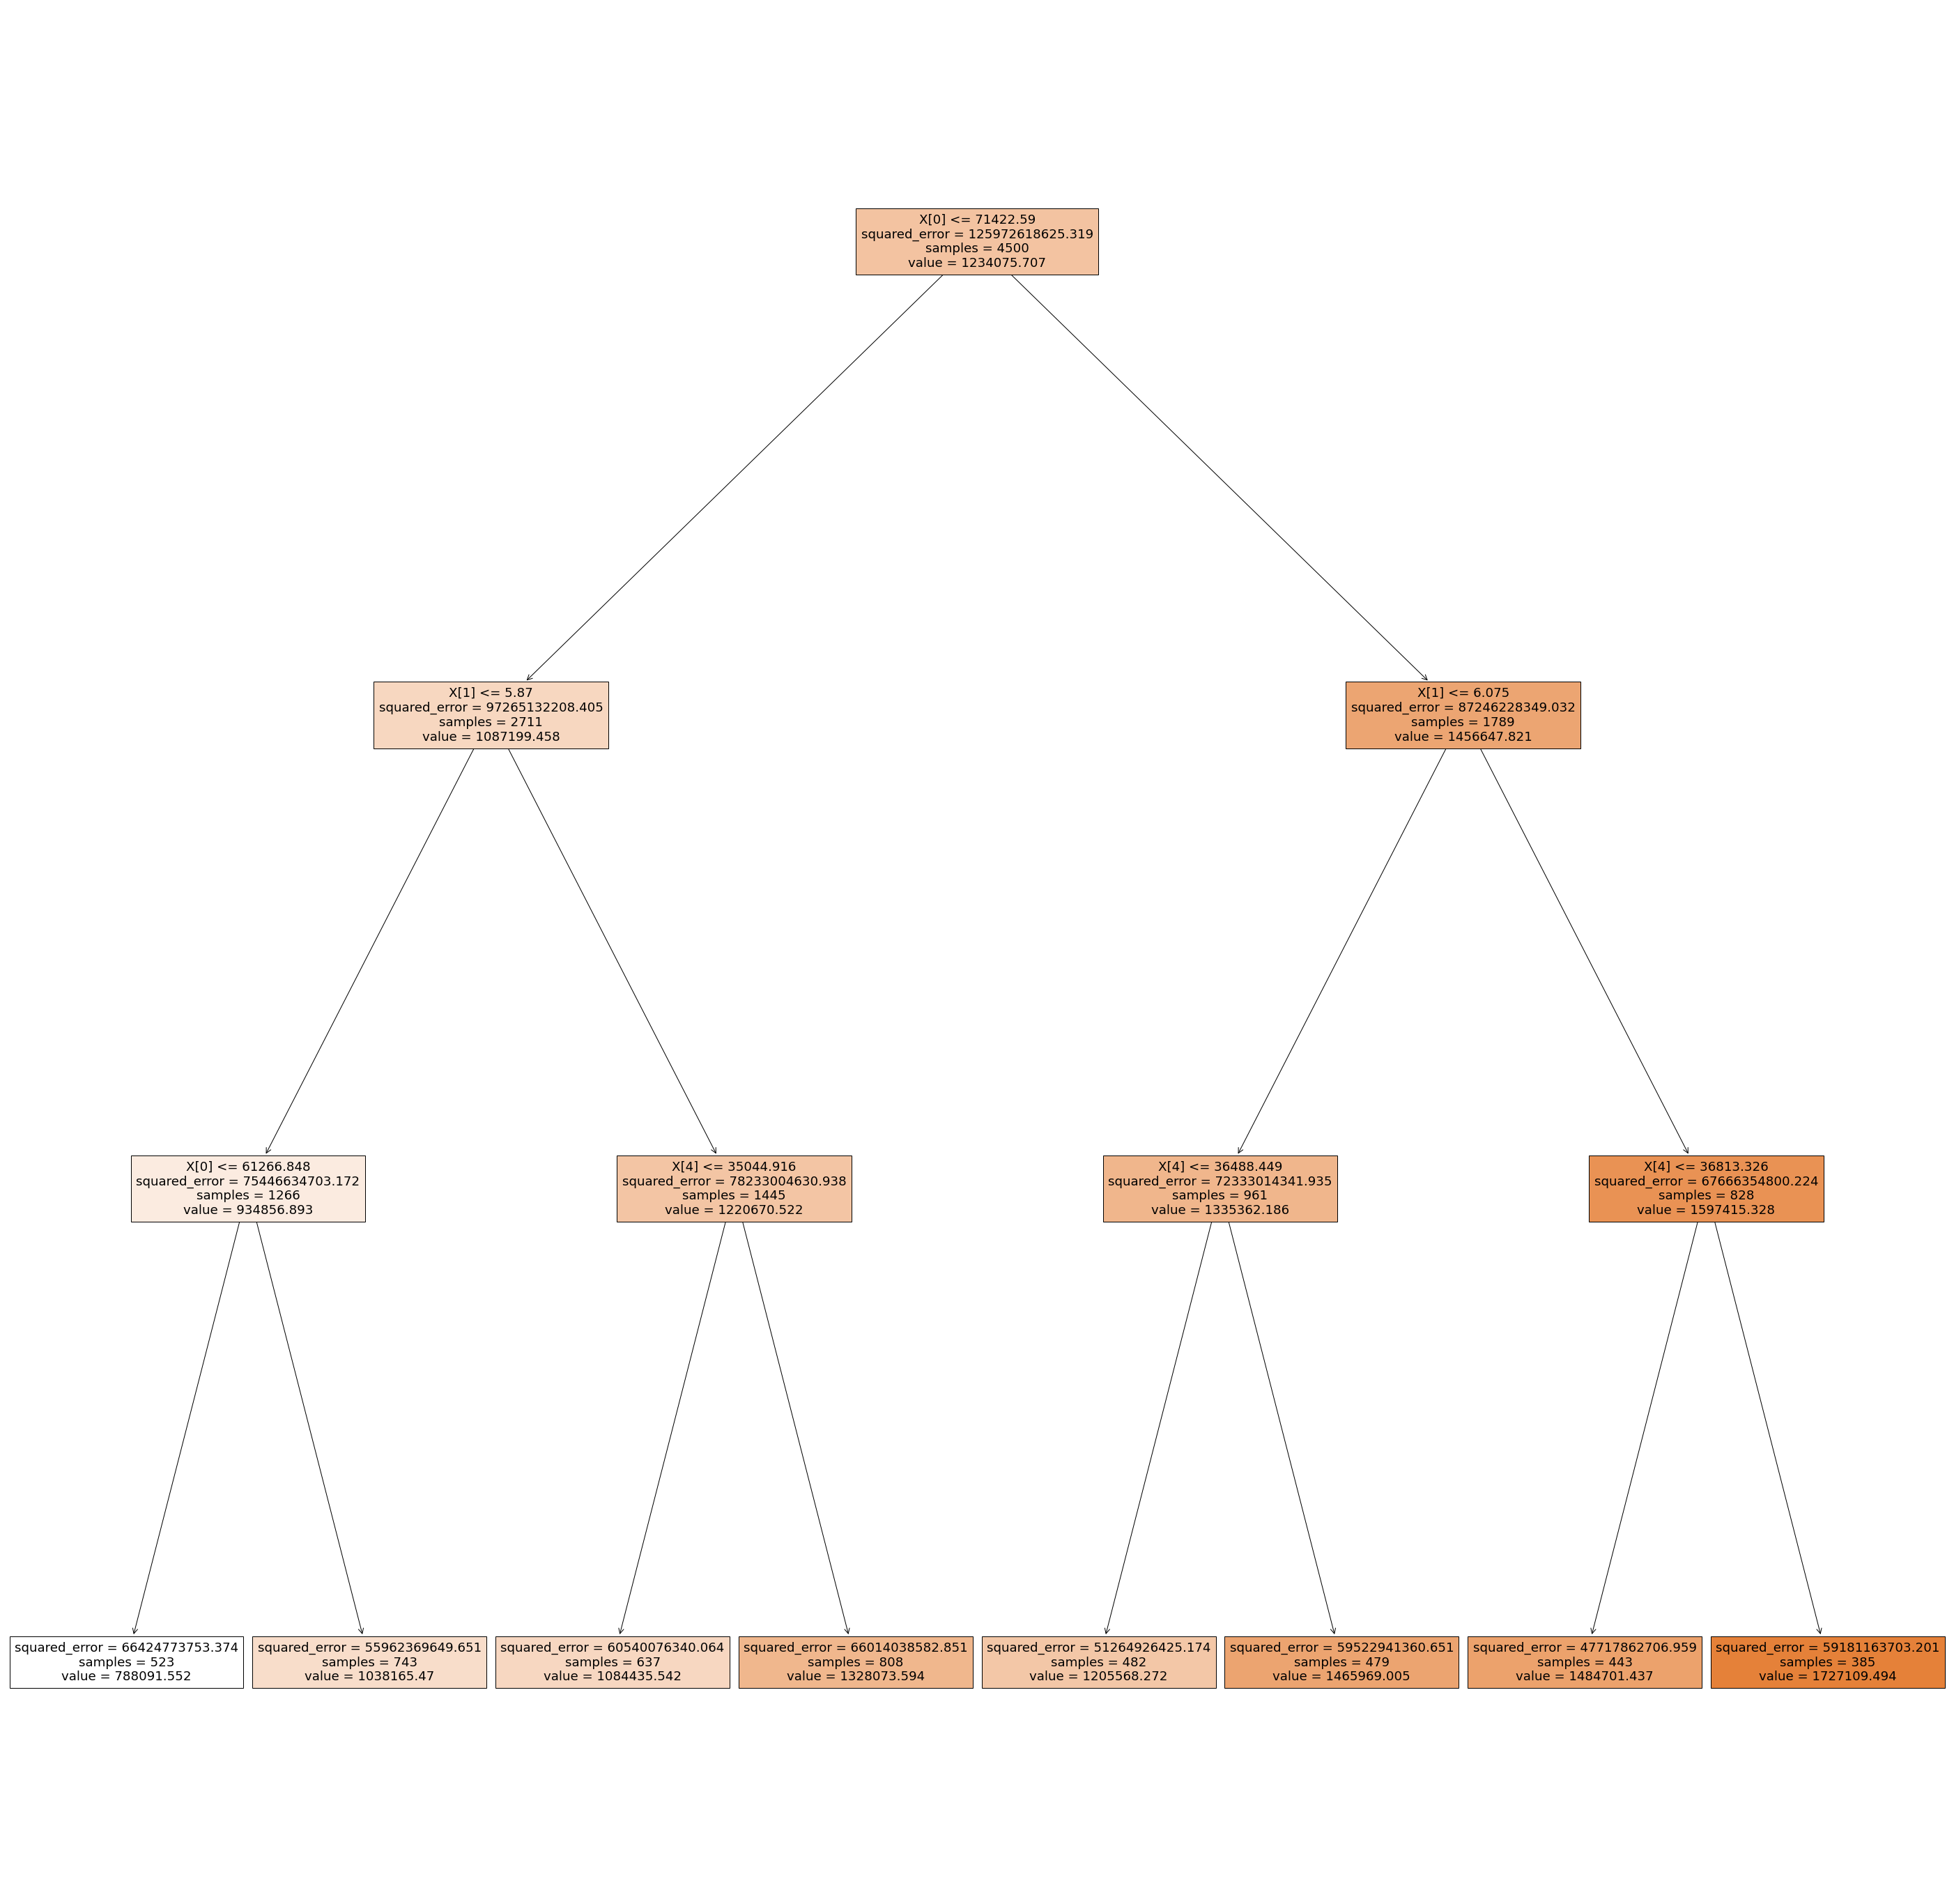

In [ ]:
plt.figure(figsize=(50,50))

plot_tree(regressor, filled=True)

From the tree, we can see that Income is the first tree splitting criteria. If the Income is more, Age of the House will be the next criteria followed by Population criteria. If the Income is less, and if the House Age is more, Population will be assesed. However, if the Income and House Age both are less, then Income will be the final criteria. Hence, it can be inferred that if the Income is low, the predicted price of the House will be low and vice versa.

##Partial Dependance Plot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

numerical_features = [c for c in X_train.columns ]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num , df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 35042.06, test MAE = 98607.935 


In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Exact explainer: 501it [01:08,  7.19it/s]


In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

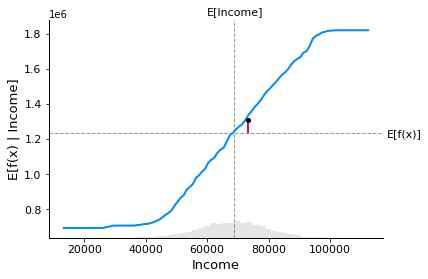

In [ ]:
partial_dependence_plot('Income', 0)

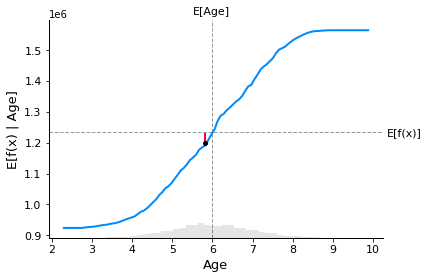

In [ ]:
partial_dependence_plot('Age', 0)

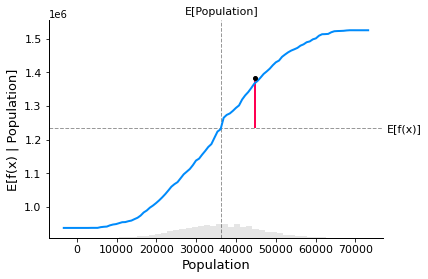

In [ ]:
partial_dependence_plot('Population', 0)

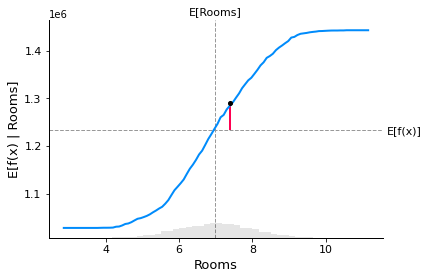

In [ ]:
partial_dependence_plot('Rooms', 0)

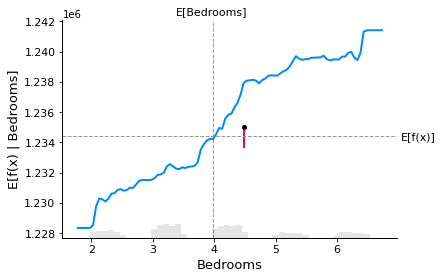

In [ ]:
partial_dependence_plot('Bedrooms', 0)

##Auto ML


In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=300

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


Starting H2O Server

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:45223 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3xz9sbmj
  JVM stdout: /tmp/tmp3xz9sbmj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3xz9sbmj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:45223
Connecting to H2O server at http://127.0.0.1:45223 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    11 days
H2O_cluster_name:           H2O_from_python_unknownUser_6ip4e5
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:45223
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

In [ ]:
# Import the processed data from notebook One
url = "https://github.com/mandardeshmukh7/DataScience/raw/main/AutoML/USA_Housing.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#Omiting null values
df = df.na_omit()

In [ ]:
#Dropping Address column
df = df.drop('Address',1)

In [ ]:
df.types

{'Area Population': 'real',
 'Avg. Area House Age': 'real',
 'Avg. Area Income': 'real',
 'Avg. Area Number of Bedrooms': 'real',
 'Avg. Area Number of Rooms': 'real',
 'Price': 'real'}

In [ ]:
df.shape

(5000, 6)

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(3975, 6)
(1025, 6)


**Setting Target and Predictor Variabled**

In [ ]:
# Set the features and target
X=df.columns
print(X)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [ ]:
# Set target and predictor variables
y ='Price'
X.remove(y) 
print(X)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=3, exclude_algos = ["StackedEnsemble", "DeepLearning"])

In [ ]:
#Train the aml
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220425_34616_model_15


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               88.0                      88.0              32013.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        5.0        5.0         5.0         9.0        32.0    24.272728



ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 8087190645.323055
RMSE: 89928.80876183702
MAE: 71840.13326208727
RMSLE: 0.09600037105437961
Mean Residual Deviance: 8087190645.323055

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 12302941684.831997
RMSE: 110918.62641068
MAE: 89065.94116238522
RMSLE: 0.11941933983554469
Mean Residual Deviance: 12302941684.831997

Cross-Validation Metrics Summary: 


mean            sd    cv_1_valid  \
0                     mae  8.907878e+04  1.381957e+03  9.041617e+04   
1  mean_residual_deviance  1.230471e+10  2.508542e+08  1.243855e+10   
2                     mse  1.230471e+10  2.508542e+08  1.243855e+10   
3                      r2  9.015418e-01  4.404353e-03  9.012729e-01   
4       residual_deviance  1.230471e+10  2.508542e+08  1.243855e+10   
5                    rmse  1.109220e+05  1.134942e+03  1.115283e+05   
6                   rmsle  1.184443e-01  1.684420e-02  1.101083e-01   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  8.930745e+04  8.677327e+04  8.977220e+04  8.912483e+04  
1  1.231138e+10  1.190071e+10  1.257029e+10  1.230262e+10  
2  1.231138e+10  1.190071e+10  1.257029e+10  1.230262e+10  
3  9.050893e-01  8.941185e-01  9.028264e-01  9.044021e-01  
4  1.231138e+10  1.190071e+10  1.257029e+10  1.230262e+10  
5  1.109567e+05  1.090904e+05  1.121173e+05  1.109172e+05  
6  1.459606e-01  1.012027e-01  1.196102e-01  1.153398e-01


Scoring History: 


timestamp           duration  number_of_trees  training_rmse  \
0     2022-04-25 03:50:45   1 min  0.864 sec              0.0  354057.631612   
1     2022-04-25 03:50:45   1 min  0.889 sec              5.0  271341.746819   
2     2022-04-25 03:50:45   1 min  0.912 sec             10.0  217936.407958   
3     2022-04-25 03:50:45   1 min  0.935 sec             15.0  178525.644946   
4     2022-04-25 03:50:45   1 min  0.958 sec             20.0  150185.214450   
5     2022-04-25 03:50:45   1 min  0.982 sec             25.0  129515.189267   
6     2022-04-25 03:50:45   1 min  1.004 sec             30.0  116388.619753   
7     2022-04-25 03:50:45   1 min  1.027 sec             35.0  108554.085497   
8     2022-04-25 03:50:45   1 min  1.052 sec             40.0  103172.217905   
9     2022-04-25 03:50:45   1 min  1.074 sec             45.0   99190.452012   
10    2022-04-25 03:50:45   1 min  1.096 sec             50.0   96610.120957   
11    2022-04-25 03:50:45   1 min  1.119 sec             55.0   94716.840845   
12    2022-04-25 03:50:45   1 min  1.141 sec             60.0   93355.258541   
13    2022-04-25 03:50:46   1 min  1.164 sec             65.0   92389.981007   
14    2022-04-25 03:50:46   1 min  1.186 sec             70.0   91739.446502   
15    2022-04-25 03:50:46   1 min  1.209 sec             75.0   91051.862747   
16    2022-04-25 03:50:46   1 min  1.229 sec             80.0   90585.607105   
17    2022-04-25 03:50:46   1 min  1.251 sec             85.0   90171.963286   
18    2022-04-25 03:50:46   1 min  1.263 sec             88.0   89928.808762   

     training_mae  training_deviance  
0   283433.250598       1.253568e+11  
1   217437.682751       7.362634e+10  
2   174505.392358       4.749628e+10  
3   142992.346289       3.187141e+10  
4   120087.905746       2.255560e+10  
5   103457.308136       1.677418e+10  
6    92984.082743       1.354631e+10  
7    86852.270699       1.178399e+10  
8    82595.225259       1.064451e+10  
9    79484.316194       9.838746e+09  
10   77439.764952       9.333515e+09  
11   75959.892071       8.971280e+09  
12   74871.486996       8.715204e+09  
13   73983.629304       8.535909e+09  
14   73398.354367       8.416126e+09  
15   72806.617594       8.290442e+09  
16   72408.444095       8.205752e+09  
17   72043.719964       8.130983e+09  
18   71840.133262       8.087191e+09


Variable Importances: 


variable  relative_importance  scaled_importance  \
0              Avg. Area Income         9.357453e+14           1.000000   
1           Avg. Area House Age         4.441743e+14           0.474674   
2               Area Population         3.928638e+14           0.419841   
3     Avg. Area Number of Rooms         2.232799e+14           0.238612   
4  Avg. Area Number of Bedrooms         3.109622e+13           0.033231   

   percentage  
0    0.461604  
1    0.219112  
2    0.193800  
3    0.110144  
4    0.015340

In [ ]:
#printing the leaderboard
print(aml.leaderboard)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 GBM_grid_1_AutoML_1_20220425_34616_model_15 110919 1.23029e+10 89065.9 0.119419 1.23029e+10 
 XGBoost_grid_1_AutoML_1_20220425_34616_model_10 111588 1.24519e+10 89326.5 0.118792 1.24519e+10 
 XGBoost_grid_1_AutoML_1_20220425_34616_model_8 112301 1.26115e+10 89836.4 0.114508 1.26115e+10 
 GBM_grid_1_AutoML_1_20220425_34616_model_6 112350 1.26225e+10 89928.1 0.12432 1.26225e+10 
 GBM_grid_1_AutoML_1_20220425_34616_model_13 112618 1.26828e+10 89732.1 0.120146 1.26828e+10 
 GBM_grid_1_AutoML_1_20220425_34616_model_16 112831 1.27308e+10 89762.9 0.118991 1.27308e+10 
 GBM_2_AutoML_1_20220425_34616 113177 1.28091e+10 90718.6 0.124793 1.28091e+10 
 GBM_grid_1_AutoML_1_20220425_34616_model_17 113264 1.28288e+10 90322.1 0.122371 1.28288e+10 
 GBM_grid_1_AutoML_1_20220425_34616_model_8 113275 1.28313e+10 90617 0.126285 1.28313e+10 
 XGBoost_grid_1_AutoML_1_20220425_34616_model_25 113333 1.28444e+10 90589.5 0.122963 1.28444e+10

In [ ]:
#Excluding the StackedEnsemble

model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_1_20220425_34616_model_15': 0,
 'GLM_1_AutoML_1_20220425_34616': 70}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [ ]:
#Get Best Model
best_model.algo

'gbm'

Using AutoML, GBM is the best model

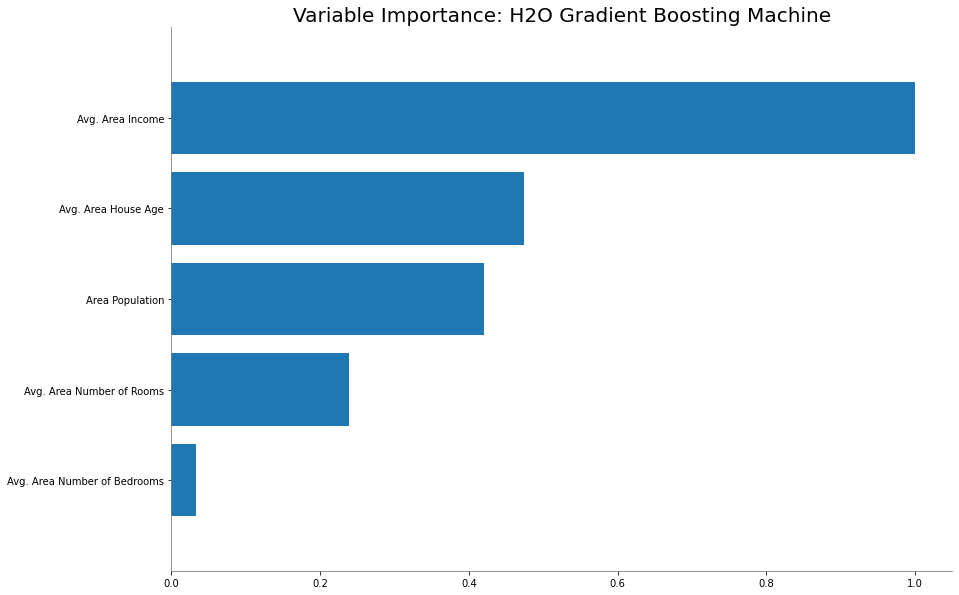

<Figure size 432x288 with 0 Axes>

In [ ]:
best_model.varimp_plot()

From the Variable Importance Plot, it can be seen that Income has a strong linear relationship with the target variable(Price) followed by Age, Population and Rooms. Bedrooms has least impact on target variable.

##Shap Plots

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

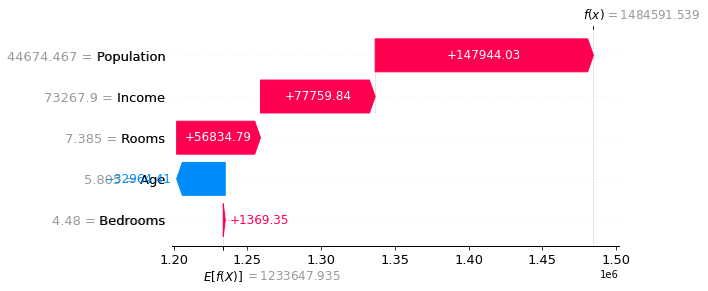

In [ ]:
sample_feature_importance(0, 'waterfall')


In [ ]:
shap.initjs()

sample_feature_importance(0, 'condensed')


##Feature Importance

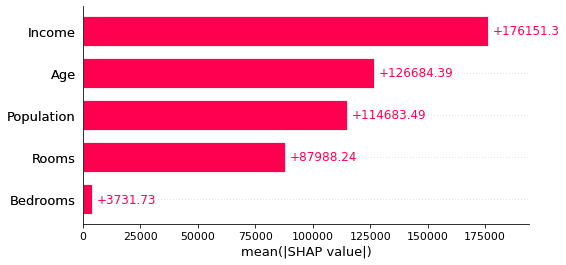

In [ ]:
shap.plots.bar(shap_values)


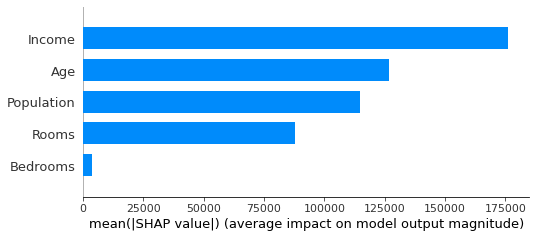

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')


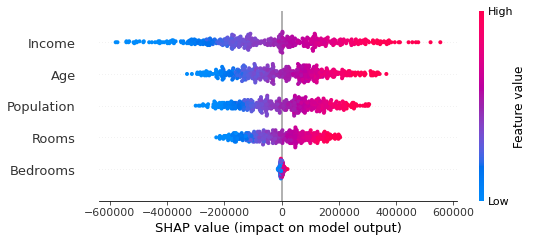

In [ ]:
shap.plots.beeswarm(shap_values)

* The beeswarm plot identifies the impact of each feature on the model's output. Features are ordered following the sum of SHAP value magnitudes across all samples.

* X-axis is for the SHAP values (impact on model) and y-axis is for the feature values (red indicates high values while blue indicate low values of the feature).

* From this plot we can notice that high values of "Income" feature  have an important impact on the model output as it is linear.

* We can also observe that "age", "population" and "Rooms" feature influences, with an uniform distribution, the model output with both its high and low values.

* As an other example, "Bedrooms" feaature has less importance and it hardly  influences the model output.

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(reg)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(X_train, y_train)
y_predict_gb = gb_model.predict(X_test)

In [ ]:
# checking model accuracy from sklearn.metrics import r2_score, mean_squared_error 
import numpy as np

In [ ]:
# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
gb_mse = mean_squared_error( y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))
gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

Root Mean Squared Error =  115154.818
R square Score =  0.882


##LIME




##Decision Tree

In [ ]:
!pip install lime

In [ ]:


import lime
from pandas.core.frame import DataFrame
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

df_pd = pd.DataFrame(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

regressor = DecisionTreeRegressor( max_depth=3,random_state=33)

regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

236240.27142131788

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# LIME has one explainer for all the models
explainer_decisiontree = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  verbose=True, mode='regression')

In [ ]:
j = 45
exprf = explainer_decisiontree.explain_instance(df_pd.values[j], regressor.predict, num_features=5)

Intercept 1201775.8935968669
Prediction_local [1334186.32023899]
Right: 1328073.593760908


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [ ]:
# Show the predictions
exprf.show_in_notebook(show_table=True)

In [ ]:
exprf.as_list()

[('5.97 < Age <= 6.66', 164674.72129906525),
 ('61482.80 < Income <= 68808.35', -143744.7130514976),
 ('Population > 42894.97', 120107.91760353938),
 ('Bedrooms <= 3.15', -11736.339796665712),
 ('6.30 < Rooms <= 7.00', 3108.840587685909)]

As seen for Decision Tree Regressor, it can be inferred that Income has a negative impact on the prediction of House Prices. All the other features have a positive impact on House Prices. Amongst all, Population has a huge positive impact on the prediction of Prices.

##Linear Regression

In [ ]:
data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

103192.53959330427

In [ ]:
explainer_linear = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                verbose=True, mode='regression')

In [ ]:
j = 37
linear = explainer_linear.explain_instance(X_test.values[j], model.predict, num_features=16)

Intercept 1206558.0330573558
Prediction_local [1338235.31759904]
Right: 1228942.573431315


X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
# Show the predictions
linear.show_in_notebook(show_table=True)

In [ ]:
linear.as_list()

[('Population <= 29423.16', -290535.7441997762),
 ('Age > 6.66', 287124.83119462495),
 ('Rooms > 7.67', 222641.9316851378),
 ('61482.80 < Income <= 68808.35', -104234.83509249485),
 ('Bedrooms > 4.49', 16681.10095418787)]

For linear model, Age, Rooms and Bedrooms affect the Price positively. However, Population and Income has a strong negative effect on the Housing Prices.

##GBM

In [ ]:
data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(X_train, y_train)
y_predict_gb = gb_model.predict(X_test)

In [ ]:
# checking model accuracy from sklearn.metrics import r2_score, mean_squared_error 
import numpy as np

# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
gb_mse = mean_squared_error( y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))
gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

Root Mean Squared Error =  115154.818
R square Score =  0.882


In [ ]:
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Price'], verbose=True, mode='regression')

In [ ]:
i = 3
expgbm = explainer.explain_instance(X_test[i], gb_model.predict, num_features=10)
expgbm.show_in_notebook(show_table=True)

Intercept 1309252.5354985048
Prediction_local [991610.97520961]
Right: 1032325.6197084758


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


For the GBM Model, there is a huge positive impact by Income and Population on the Housing Prices. On the other hand, Age, rooms and Bedrooms has a little negative impact on the Prices.

##SHAP

##Linear Regression

In [ ]:
data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

103192.53959330427

In [ ]:
# compute the SHAP values for the linear model

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

explainer = shap.Explainer(model.predict,X100)
shap_values = explainer(X)

Exact explainer: 5001it [01:15, 61.62it/s]                           


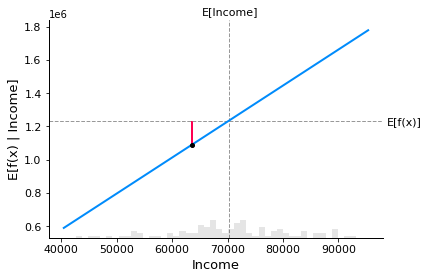

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "Income", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

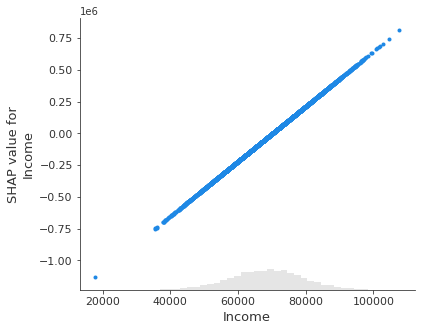

In [ ]:
shap.plots.scatter(shap_values[:,"Income"])

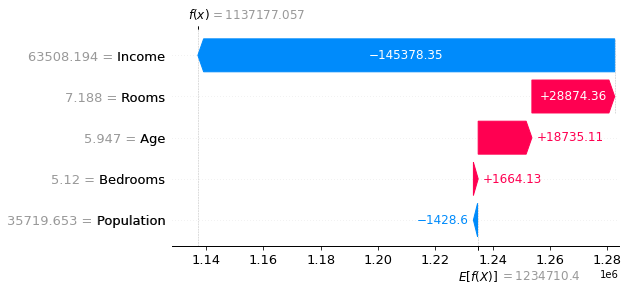

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

For the linear model, and predicted price of 1234710.4, Rooms has the positive impact on the target variable. On the other hand, Income has the negative influence on the target variable Price.

##GBM

In [ ]:
data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(X_train, y_train)
y_predict_gb = gb_model.predict(X_test)

In [ ]:

 #checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
gb_mse = mean_squared_error( y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))
gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))


Root Mean Squared Error =  115154.818
R square Score =  0.882


In [ ]:
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)




In [ ]:
import shap
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(df_pd)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], df_pd.iloc[0,:])


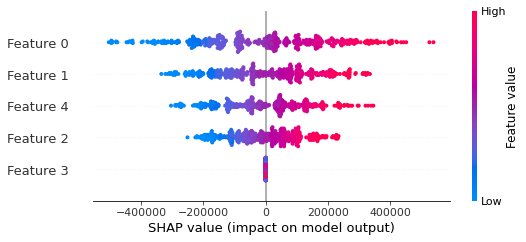

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
df.columns

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price']

For the GBM Model, the predicted price is 1483542. Income has a huge influence on the Price. Population and Rooms too have a positive impact. However, Age has a negative impact on the target variable. 

##Decision Tree

In [ ]:
data2=data.drop(columns=['Address'])

X = data2.drop('Price', axis=1)
y = data2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:

from sklearn.tree import DecisionTreeRegressor, plot_tree




texplainer = shap.TreeExplainer(regressor)

shap_values = texplainer.shap_values(X_test)

shap_values


array([[ 265478.36206086, -136219.9375495 ,       0.        ,
              0.        ,  102634.87290712],
       [-182447.4671809 ,  142203.5305142 ,       0.        ,
              0.        , -109396.22808287],
       [ 224545.90424413,  135847.97276929,       0.        ,
              0.        , -109768.14698412],
       ...,
       [-124056.91365778,   83812.97699108,       0.        ,
              0.        , -109396.22808287],
       [ -99414.12125102, -143439.19646483,       0.        ,
              0.        ,   46943.08091301],
       [ -80022.11609259,   80491.83384806,       0.        ,
              0.        ,   93528.1688154 ]])

In [ ]:
shap.initjs()

shap.force_plot(texplainer.expected_value, shap_values[0], X_test.iloc[0])

The Predicted price is 1465969 for the Decision Tree Model. From the plots it can be inferred that, Income has a significant positive influence on the target variable Price. It is followed by Population which has a positive impact as well. On the other hand, Age affects negatively on the House Prices.

##CONCLUSION

SHAP (SHapley Additive exPlanation) leverages the idea of Shapley values for model feature influence scoring and LIME (Local Interpretable Model-agnostic Explanations) builds sparse linear models around each prediction to explain how the model works in that local vicinity. Using the SHAP, LIME Analysis on different models, it can be inferred that Income has the highest influence on the Housing Prices for the USA Housing Prices Dataset.

##REFERENCES:

Dataset (https://www.kaggle.com/datasets/kanths028/usa-housing)

OLS(https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc)

Github (https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb)

Lime (https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions)

SHAP (https://shap.readthedocs.io/en/latest/index.html)

LIME (https://c3.ai/glossary/data-science/lime-local-interpretable-model-agnostic-explanations/)

##MIT License

Copyright (c) 2022 mandardeshmukh7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
